[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]]


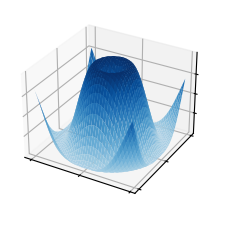

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(Z)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [14]:
R = 1 # sphere radius
T = 1 # simulation time

j = 0.01 # dp
k = 0.00001 # dt

p = np.arange(0, R+j, j)
t = np.arange(0, T+k, k)

n = len(p)
m = len(t)

T = np.zeros((n, m+1)) # includes ghost node

T[0, :] = 20
T[:, 0] = 100

factor = k/(j**2)

if factor > 0.5:
    print("Factor is too large")

for i in range(1, n):
    for j in range(1, m):
        T[i,j] = (1-2*factor)*T[i-1,j] + factor*(T[i-1,j-1] + T[i-1,j+1])
        T[i,-1] = T[i,-3]

T = T[:, :-1] # remove ghost node

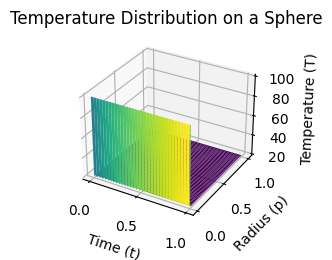

In [20]:
# Create meshgrid
pp, tt = np.meshgrid(p, t)

T = T.transpose()

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(pp, tt, T, cmap='viridis')

# Add labels and title
ax.set_xlabel('Time (t)')
ax.set_ylabel('Radius (p)')
ax.set_zlabel('Temperature (T)')
ax.set_title('Temperature Distribution on a Sphere')

# Show the plot
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sim_t = 1
R = 1
dt = 0.25
dp = 0.25

t = np.arange(0, sim_t + dt, dt) # initialize temporal grid
p = np.arange(0, R + dp, dp) # initialize spatial grid
n = len(t) # number of time steps
m = len(p) # number of space steps
T = np.zeros((n, m + 1))  # initializing temperature matrix, includes ghost node

T[0, :] = 20 # loading boundary condition 2
T[:, 0] = 100 # loading boundary condition 1

T





array([[100.,  20.,  20.,  20.,  20.,  20.],
       [100.,   0.,   0.,   0.,   0.,   0.],
       [100.,   0.,   0.,   0.,   0.,   0.],
       [100.,   0.,   0.,   0.,   0.,   0.],
       [100.,   0.,   0.,   0.,   0.,   0.]])

In [12]:
F = 0.4

for i in range(1, n):
    for j in range(1, m):
        print(i, j)
        T[i, j] = (1 - 2 * F) * T[i - 1, j] + F * (T[i - 1, j - 1] + T[i - 1, j + 1])  # explicit scheme
    T[i, -1] = T[i, -3]  # neumann boundary condition
T = T[:, :-1]  # Remove ghost node

array([[100.   ,  20.   ,  20.   ,  20.   ,  20.   ],
       [100.   ,  52.   ,  20.   ,  20.   ,  20.   ],
       [100.   ,  58.4  ,  32.8  ,  20.   ,  20.   ],
       [100.   ,  64.8  ,  37.92 ,  25.12 ,  20.   ],
       [100.   ,  68.128,  43.552,  28.192,  24.096]])

In [6]:
import numpy as np

sim_t = 1
dt = 0.5

R = 10
dx = 0.1

t = np.arange(0, sim_t, dt)
x = np.arange(0, R, dx)

t

array([0. , 0.5])

NameError: name 'egg_type' is not defined

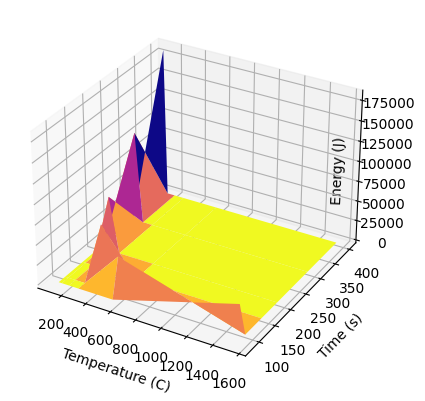

In [8]:
import numpy as np
import matplotlib.pyplot as plt

T = [82, 100, 150, 200, 300, 400]
t = [1543.7, 552.7, 273.7, 196.0, 136.2, 110.7]
E = [44912, 46972, 55378, 68526, 112417, 183491]

TT, tt = np.meshgrid(T, t) # Create meshgrid

def create_diagonal_matrix(input_list):
    diagonal_matrix = np.diag(input_list)
    return diagonal_matrix

# Create the diagonal matrix
E = create_diagonal_matrix(E)

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') # Create 3D surface plot
ax.plot_surface(tt, TT, E, cmap='plasma_r') # Plot the surface

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Energy (J)')
ax.zaxis.labelpad = -30
ax.set_title('1D Heat Diffusion for a(n) {}'.format(egg_type))

plt.show()

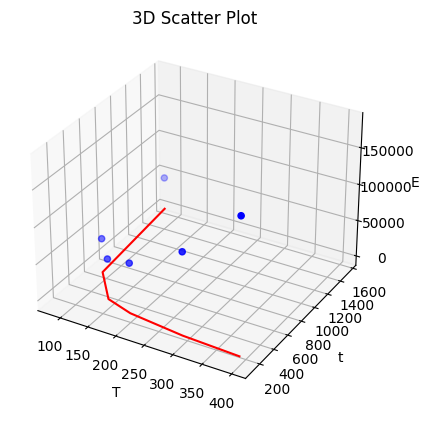

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
T = [82, 100, 150, 200, 300, 400]
t = [1543.7, 552.7, 273.7, 196.0, 136.2, 110.7]
E = [44912, 46972, 55378, 68526, 112417, 183491]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(T, t, E, c='b', marker='o')

# Connect the points with lines
# ax.plot(T, t, E, c='r')
ax.plot(T, t, zs=0, zdir='z', color='r')

# Set labels for the axes
ax.set_xlabel('T')
ax.set_ylabel('t')
ax.set_zlabel('E')

# Set a title for the plot
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


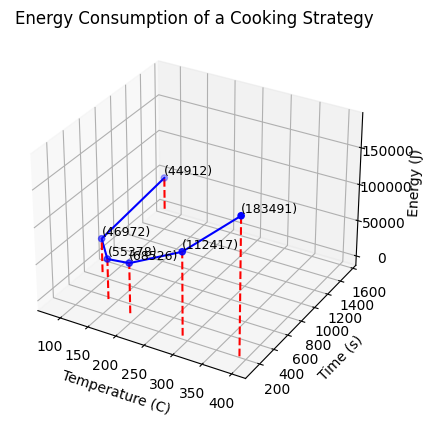

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
T = [82, 100, 150, 200, 300, 400]
t = [1543.7, 552.7, 273.7, 196.0, 136.2, 110.7]
E = [44912, 46972, 55378, 68526, 112417, 183491]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(T, t, E, c='b', marker='o')

# Connect the points with lines along the z-axis
ax.plot(T, t, E, c='b')

# Plot vertical lines from the XY plane
for i in range(len(T)):
    ax.plot([T[i], T[i]], [t[i], t[i]], [0, E[i]], c='r', linestyle='dashed')
    ax.text(T[i], t[i], E[i], f'({E[i]})', fontsize=9, ha='left', va='bottom')

# Set labels for the axes
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Energy (J)')

# Set a title for the plot
ax.set_title('Energy Consumption of a Cooking Strategy')

# Show the plot
plt.show()
